# Part I - (Dataset Exploration Title)
## by (Ammar Ramadan)



## Preliminary Wrangling

In [93]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick

# my own code
from wrangle_data import wrangle_data

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [94]:
df = pd.read_csv("data/prosperLoanData.csv")
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


### What is the structure of your dataset?

> Loan Data from Prosper <br> 
    This data set contains 113,937 loans with 81 variables on each loan, <br>
    Here are the explanation of some variables. <p>
    <code>BorrowerRate</code>:  The Borrower's interest rate for this loan. <p>
    <code>BorrowerStatus</code>: Wether the borrower did good and paid his loan or messed up and paid late or didn't pay<p>
    <code>BorrowerState</code>: The two letter abbreviation of the state of the address of the borrower at the time the Listing was created.<p>
    <code>EmploymentStatus</code>: The employment status of the borrower at the time they posted the listing.<p>
    <code>EstimatedLoss</code>: Estimated loss is the estimated principal loss on charge-offs. Applicable for loans originated after July 2009.<p>
    <code>InterestAmount</code>: The amount of interest borrower paid.<p>
    <code>LoanStatus</code>: The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.<p>
    <code>EstimatedLoss</code>: It shows the estimation of how much money that bank would lose.<p>
<hr>

### What is/are the main feature(s) of interest in your dataset?

> I'm interested in the interest rate of the loan to check wether the interest affect the borrower ability to payback or not.<br>
I will also check the employment status of the borrower and see wether this have effect on loan status or not.<br>
I will put in mind variables like income range and loan amount.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> `LoanOriginalAmount`, `EmploymentStatus`, `BorrowerRate`, `EstimatedLoss` and `IncomeRange` all of these I think are usefull variables that I will use to check how is the borrower doing <br>

### Wrangle data

In [95]:
df = wrangle_data(df)

## Univariate Exploration

> In this section, investigate distributions of individual variables. If you see unusual points or outliers, take a deeper look to clean things up and prepare yourself to look at relationships between variables.


#### What is the most popular interest rate ?

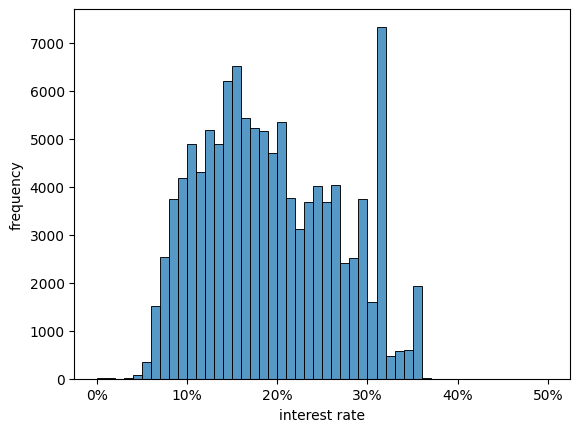

In [96]:
# Use np.round because computers are bad at computing floating point numbers
bins = np.round(np.arange(0, 0.5+0.0001, 0.01), 2)

ax = sns.histplot(data=df, x="BorrowerRate", bins=bins);

# Add units using matplotlib.ticker (imported at the first code cell)
ax.xaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.xlabel("interest rate")
plt.ylabel("frequency");

> It's unimoda distribution and it usually ranges from %8 to 20% BUT the most ubiquitous interest rate is slightly above 30%

#### What is the most common loans status ?

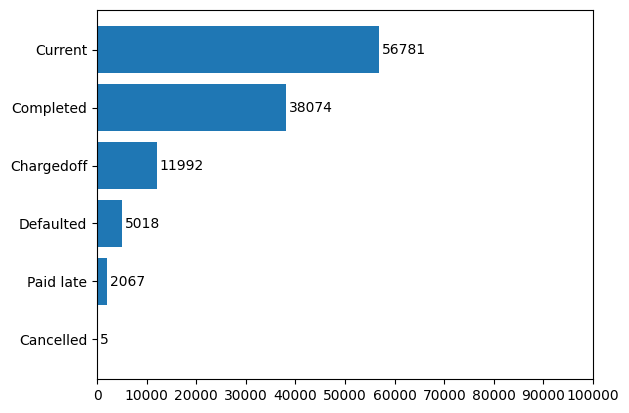

In [97]:
# Use this variable to change the scale of the plot
scale_value = 0.5

values = df["LoanStatusSummarized"].value_counts().reset_index(name="count")
values["count"] *= scale_value

plt.barh(data=values, y='LoanStatusSummarized', width='count')

# Matplotlib plots values in accending order lower value at top and highest at bottom which is not desired so we invert the order
plt.gca().invert_yaxis()

ticks_x = np.arange(0, 50_000+1, 5_000) 
plt.xticks(ticks_x, (ticks_x / scale_value).astype(int))

# Show text
for i, v in enumerate(values["count"]):
    # multiply v * 2 as we devided it by 2 earlier
    plt.text(v+300, i, int(v / scale_value), ha='left', va='center')

> Most people are in the current state of paying their debt.<br>
Large number of people completed their loans<br>
A not small number of people got defaulted or chargedoff<br>
Only 5 loans were cancelled

#### How much money people usually borrow ?

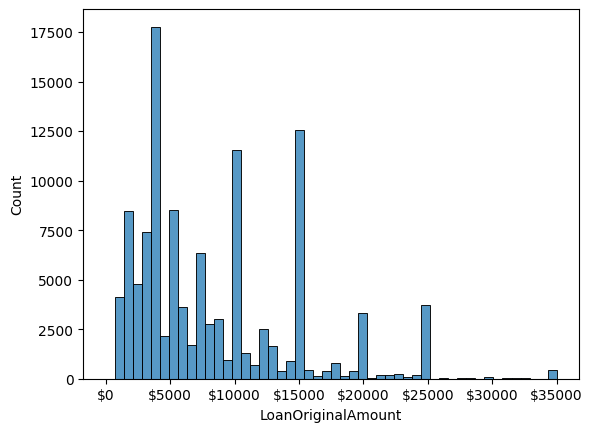

In [98]:
bins = np.arange(0, df["LoanOriginalAmount"].max()+1, 700)
ax = sns.histplot(data=df, x="LoanOriginalAmount", bins=bins);

# Add units to loan amount 
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter("$%.0f"))

> People usually take what ranges from \$100 to \$6000.
there is a big strike at \$10,000 and \$15,000 and a small strike at \$20,000 and \$25,000

#### What is the distribution of interest amount ?

only 8 people have 0 interest rate which is sad


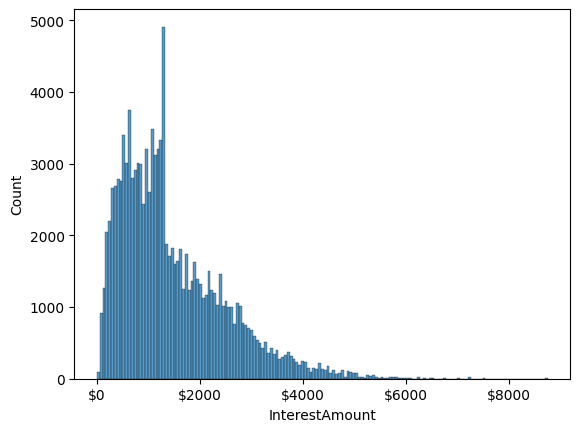

In [99]:
ax = sns.histplot(data=df, x="InterestAmount");

# How many people lend money with 0 interest.
zero_interest = (df["InterestAmount"] == 0).sum()

ax.xaxis.set_major_formatter(mtick.FormatStrFormatter("$%.0f"))
print(f"only {zero_interest} people have 0 interest rate which is sad")

> It's left skewed.
Many people pays back what ranges from \$100 to \$1500 of interest amount.

#### What is the most country that takes loans ?

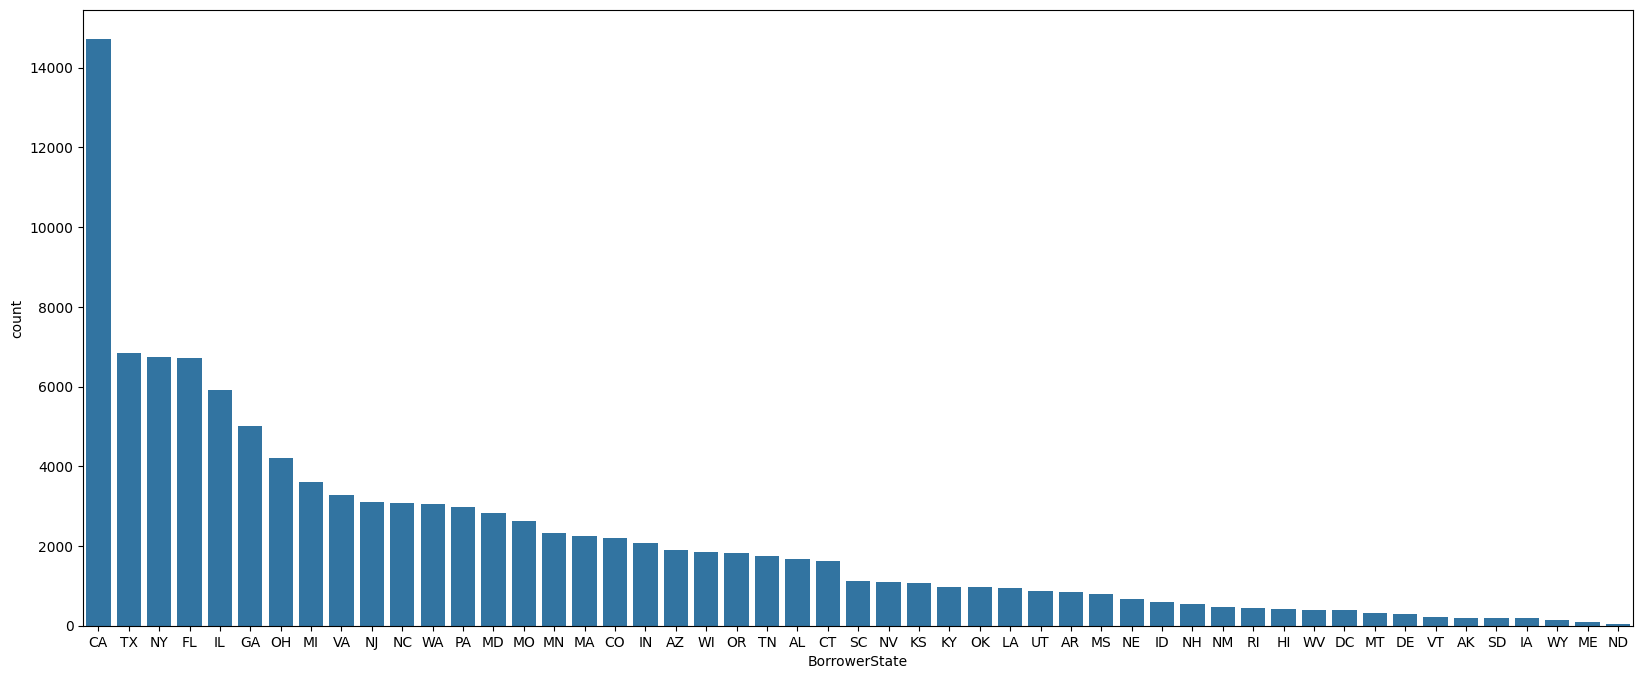

In [100]:
# Make plot bigger to fit bars
plt.figure(figsize=(20,8))
# Get the order of the borrower state counts to sort bars according to frequency
order = df["BorrowerState"].value_counts().index
sns.countplot(data=df, x='BorrowerState', color="tab:blue", order=order);

> It's obviously Canada.
Many Canadians are in debt.

#### How many people messed up after taking loans ?

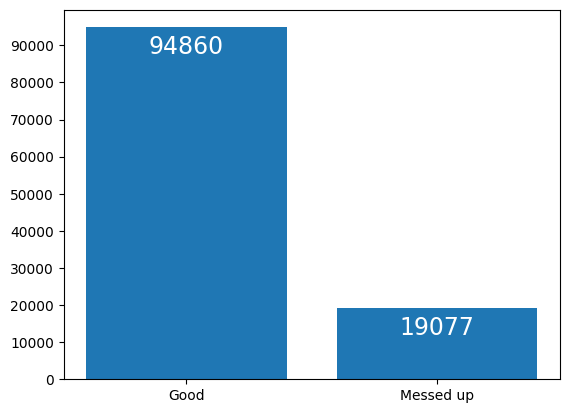

In [101]:
values = df["BorrowerStatus"].value_counts().reset_index(name='count')

plt.bar(data=values, x="BorrowerStatus", height="count")
plt.yticks( np.arange(0, 100_000, 10_000) )

for i in range(values.shape[0]):
    value = values.loc[i,"count"]
    plt.text(i, value - 2000, value, va='top', ha='center', fontdict={'size': 17}, color='white')

> 19,077 that's the number of people who messed up after taking loans.

#### How much do borrowers usually earn per year ?

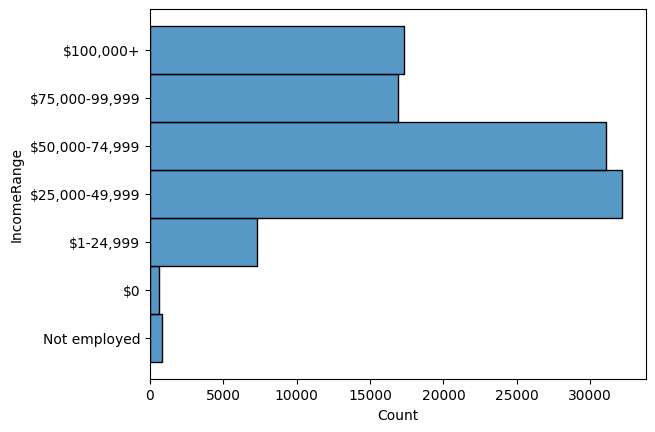

In [102]:
# remove not displayed category
data = df.loc[~df["IncomeRange"].isin(["Not displayed"]),]

ax = sns.histplot(data=data, y='IncomeRange')

# For some reason it's inverted by default
ax.yaxis.set_inverted(False)

> Most borrowers earn what ranges from \$25,000 to \$49,000

#### What is the most common purpose behind taking those loans ?

<Axes: xlabel='count', ylabel='ListingCategory'>

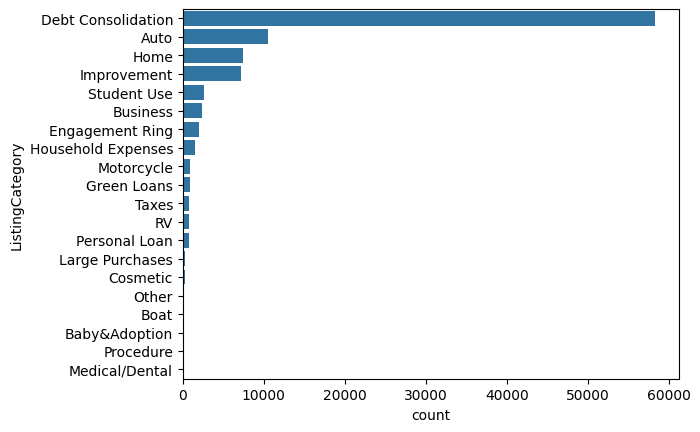

In [103]:
values = df["ListingCategory"].value_counts()
# remove Not Available data
values.drop('Not Available', inplace=True)
values = values.reset_index(name='count')

sns.barplot(data=values, y="ListingCategory", x="count")

> Most people takes debts to pay off their previous debts but we don't know what was their previous debts.
The purpose behind requesting new loans is `Auto` people buy expensive stuff and then borrow money to pay part of its price

#### What is the proportion of people with non verifiable income ?

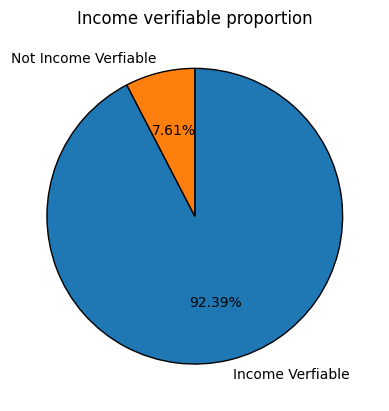

In [104]:
values = df["IncomeVerifiable"].value_counts()

plt.pie(values, startangle=90, autopct="%0.2f%%", labels=["Income Verfiable", "Not Income Verfiable"], counterclock=False, wedgeprops={"edgecolor":"k"});
plt.title("Income verifiable proportion");

> 7.61% of people doesn't have verifiable income.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> **Interest rate distribution**<br>
I formatted the interest rate ticks so they are more readable.<br>
I used np.round because computers are bad at maths when comes to floating point numbers try printing 0.1 + 0.2 in python it would be 0.30000000000000004

> **Loan Status** <br>
I combined all `Past Due` categories into one category `Paid late`
and involved `FinalPaymentInProgress` with `Current`. I put those transformations into new variable in the data frame `LoanStatusSummarized` <br>

>**Interest amount**<br>
 This is simply the product of `BorrowerRate` and `LoanOriginalAmount`


> **BorrowerStatus**<br>
I had to feature engineer this variable.<br>
Borrowers whose loan status are chargedoff, defaulted, or paid late are `Messed up` other are `Good`.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> **Interest rate distribution** <br>
It appears that the distribution of interest rate is unimodal we can see the large peak between 8% and 20% interest rate.
there is a large spike around 32% which is unusual.<br>


> **the state of the borrower**<br>
Notice that Canada is abnormally taking so much loans (that's weird).


> **Loans Status**<br>
I did turn all <b>Past Due</b> loans status into one status <b>Paid late</b>

> **Loans Status**<br>
As we can see mose of loans are either completed or current there are few borrower who didn't pay their loans or paid it late.
Almost no loans where cancelled (lenders are not feeling generous these days) <br>

> **Loan amount**<br>
Most people take loans ranges from \\$1000 to \\$8500, note that there is no loans less than \\$1000. there is also large number of people who took loans of \\$10,000 \\$15,000 \\$20,000 and \\$25,000.  seems like a pattern for me. <br>

> **Interest amount**<br>
The distribution of interest amount is left skewed. most people pay back \\$100 to \\$1500 more than their original loans and this is only good for the lenders and bad for every one else. <br>

> **BorrowerStatus**<br>
Fortunetly most borrowers are doing well but there are nearly 20,000 borrower who messed up which is not a small number.<br>

> **Verifiable Income**<br>
Banks only lend money to people with verifiable income most of the time.<br>

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your data. Make sure the variables that you cover here have been introduced in some fashion in the previous section (univariate exploration).


#### Is there a relation between Loan amount and Interest amount ?

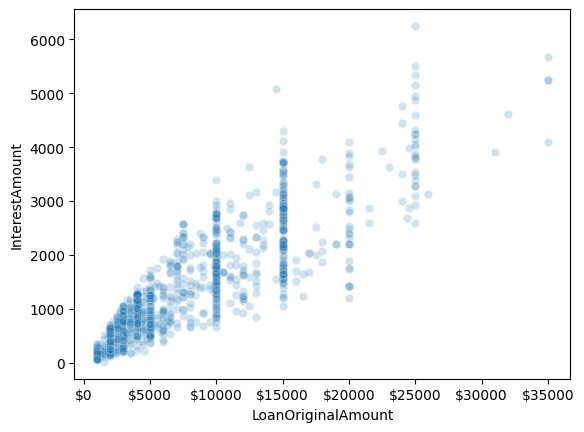

In [105]:
ax = sns.scatterplot(data=df.sample(1000), x="LoanOriginalAmount", y="InterestAmount", alpha=0.2)
ax.xaxis.set_major_formatter(mtick.FormatStrFormatter("$%.0f"))

> Yes, There is some sort of a linear relation between the two variables.
The higher the loan amount the higher the interest amount.

#### How does the  employment status of a borrower affect the borrower status ?

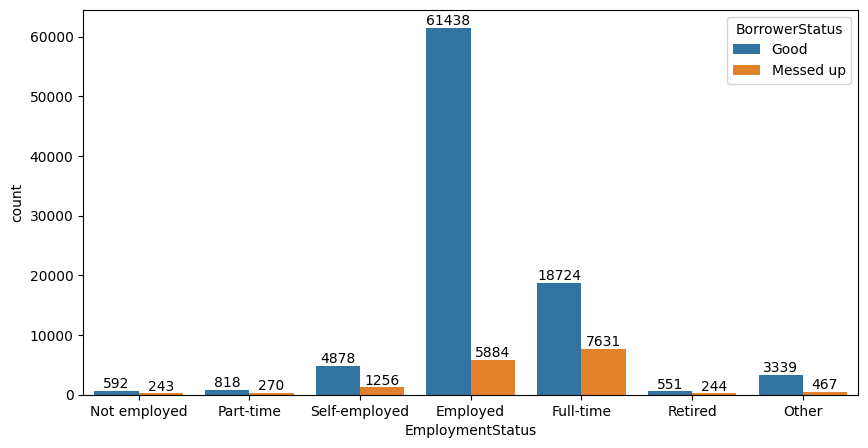

In [106]:
# Make the plot bigger so the xticks doesn't overlap
plt.figure(figsize=(10,5))

# I just wanted to make the `Other` category the last one
order = ["Not employed", "Part-time", "Self-employed", "Employed", "Full-time", "Retired", "Other"]
ax = sns.countplot(data=df, x="EmploymentStatus" ,hue="BorrowerStatus", order=order);

# add text to bars
for c in ax.containers:
    ax.bar_label(c)

> One third of full time people couldn't pay their debt on time even people with part time jobs are better.
Retired people are worse at paying back their debts than Non employed.
There is a large number of employed people who still on track.

#### What is the relation between income range and employment status ?

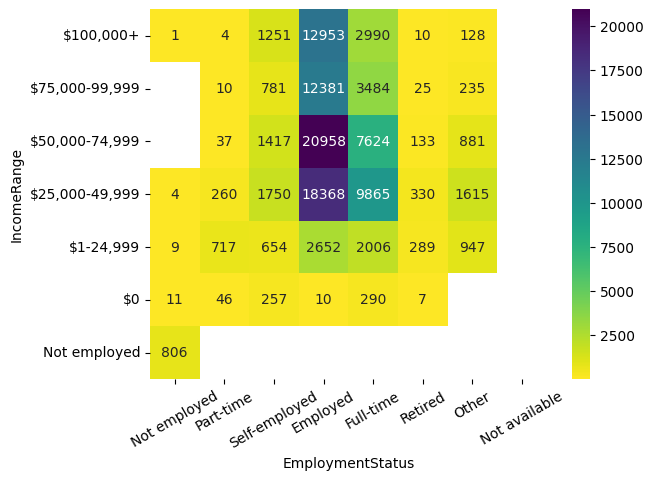

In [107]:
ct_counts = df.groupby(["IncomeRange", "EmploymentStatus"], observed=False).size().reset_index(name="count").pivot(index="IncomeRange", columns="EmploymentStatus", values="count")

# Remove `Not displayed` category
ct_counts.drop(index="Not displayed", inplace=True)

# The mask keyword arg is for making 0 values cells white
ax = sns.heatmap(ct_counts, cmap="viridis_r", annot=True, fmt=".0f", mask=~ct_counts.values.astype(bool))
ax.yaxis.set_inverted(False)
plt.xticks(rotation=30);

> Most of employed people earn \$50,000-74,999 every year.
Full-time earn less than employed people.<p>
Retired people usually earn \$25,000-49,000

#### What is the relation between loan amount and income range ?

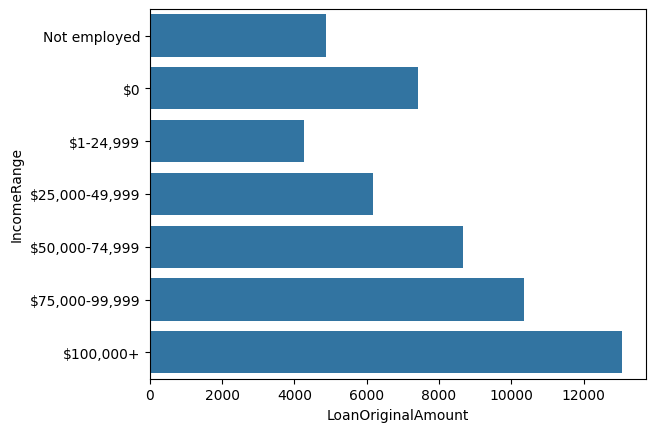

In [108]:
# get rid of the `Not displayed` category
order  = ["Not employed", "$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]

sns.barplot(data=df, x="LoanOriginalAmount", y="IncomeRange", color="tab:blue", errorbar=None, order=order);

> The higher the income the higher the loan amount except for those people who earn \$0 (those are weird).

#### What is the relation between income range and borrower status ?

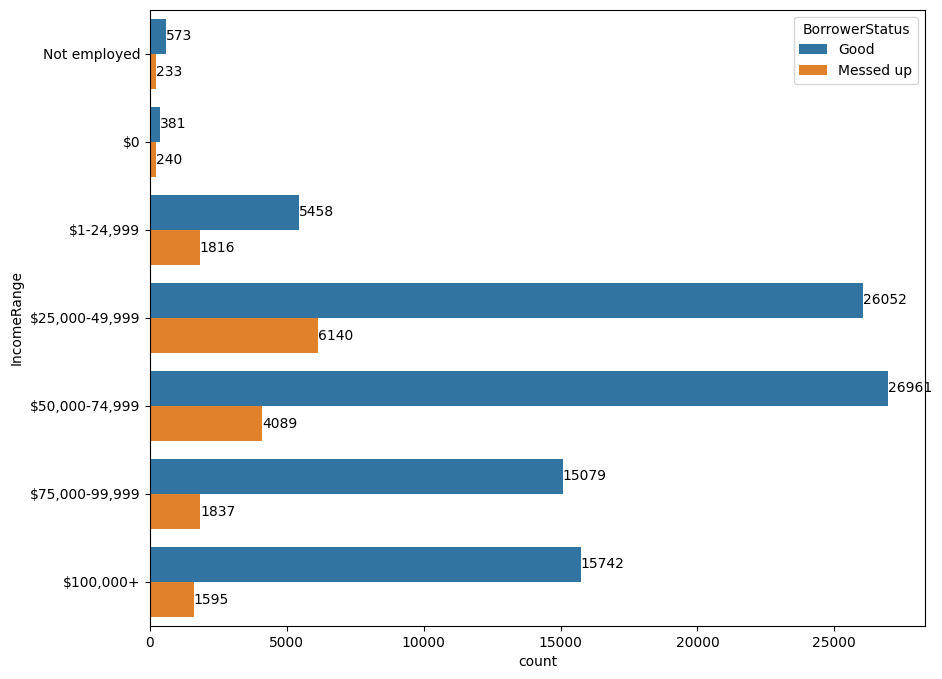

In [109]:
plt.figure(figsize=(10,8))

# get rid of the `Not displayed` category
order  = ["Not employed", "$0", "$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+"]

ax = sns.countplot(data=df, y='IncomeRange', hue="BorrowerStatus", order=order);

for c in ax.containers:
    ax.bar_label(c)

> There is a big proportion of those who earn \$0 who failed paying their debts on time.<br>
There is a large number of people who earn \$25,000-49,999 who failed paying on time.<br>
Most people who are on track earn \$50,000-74,999

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> **Employment status vs loan amount**: <br>
the plot shows us that Employed people are the one who take the largest amount of loans

>**Employment status vs borrower status**:<br>
As we can see less proportion of the employed are the one who messed up after taking a loan compared to others (so many of them did good).<br>
People who work half time nearly third of them messed up which is a huge proportion.<br>
surprisingly non employed people are as bad as full time.<br>

>**Income range vs Employment status**:<br>
as we can see all people who didn't submit there employment status data didn't submit their income range neither.<br>
Large number of employed poeple earn what ranges from \\$50,000 to \\$75,000 a year.<br>
Only one non employed person earn above \\$100,000 which is interesting. (I wonder how he make those money)<br>

> **Loan amount vs income range**: <br>
The more the income range the more money the borrower take except for those who earn \\$0 those somehow decide to borrow \\$8,000 in average and somehow the bank agrees.<br>

>**Income range vs Borrower status**:<br>
People who earn \\$0 a year (idk what is their job) don't usually borrow money and when they do they are less likely to pay back.<br>
Those who earn around \\$25,000-49,000 are more likely to fail paying back.<br>
### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> **Loan amount vs Interest amount**: <br>
there is a linear relation between those two variables.

## Multivariate Exploration

#### How much do employed people usually borrow and do they do they pay their loans and how borrower rate affect all of that ?

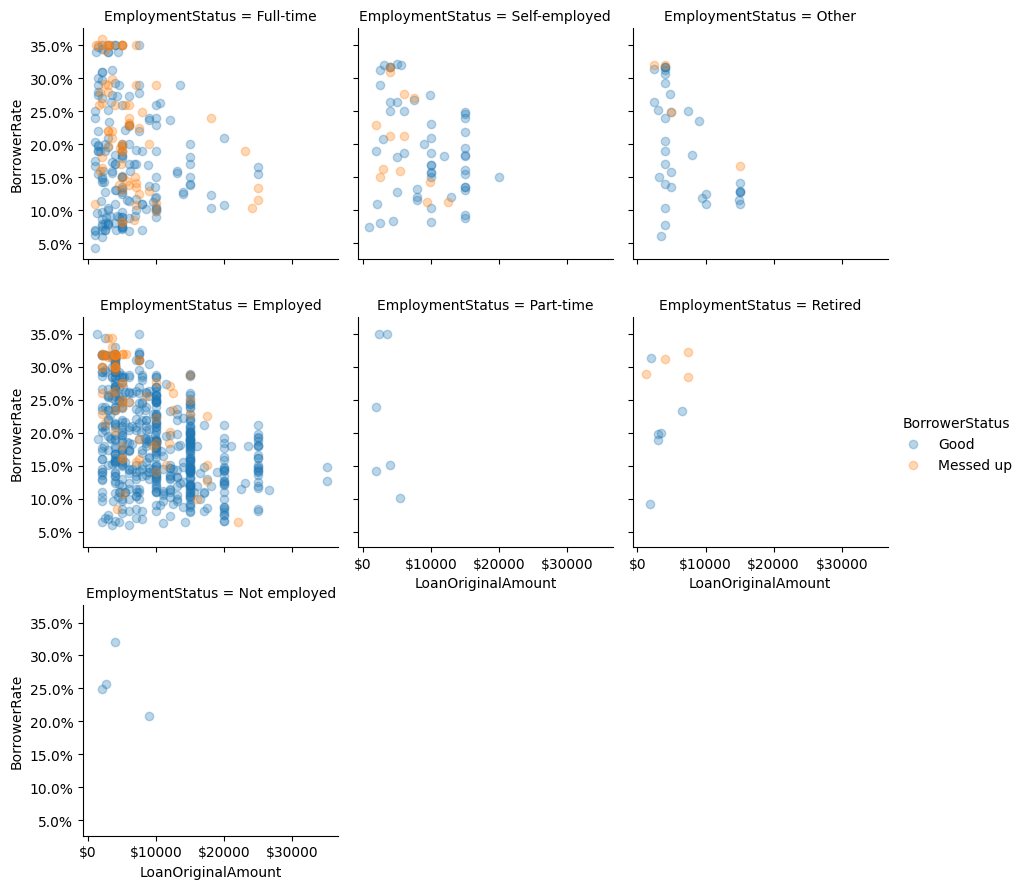

In [110]:
# Cleaning non available data
df["EmploymentStatus"] = df["EmploymentStatus"].fillna("Not available")
data = df.loc[~df["EmploymentStatus"].isin(["Not available"])].copy()
data["EmploymentStatus"] = data["EmploymentStatus"].astype(str)

# Get rid of the "Not available" category in the plot
categories =  ["Not employed", "Part-time", "Self-employed", "Employed", "Full-time", "Retired", "Other"]

g =  sns.FacetGrid(data=data.sample(1000), col="EmploymentStatus", hue="BorrowerStatus", col_wrap=3)
g.map(plt.scatter ,"LoanOriginalAmount", "BorrowerRate", alpha=0.3)

# add unit for borrower rate
for ax in g.axes.flat:
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))
    ax.xaxis.set_major_formatter(mtick.FormatStrFormatter("$%0.f"))

g.add_legend();

> There are big clusters at \$5,000 \$10,000 and \$15,000 \$20,000 and \$25,000 for employed people.<br>
Most of them pay their loans.<br>
Employed people who messed up had higher interest rate.<br>
People who work full time failed to pay compaired to the employed.<br>

#### The larger the interest rate how much the bank think they will lose ?<br>And how do loan amoun affect that ?


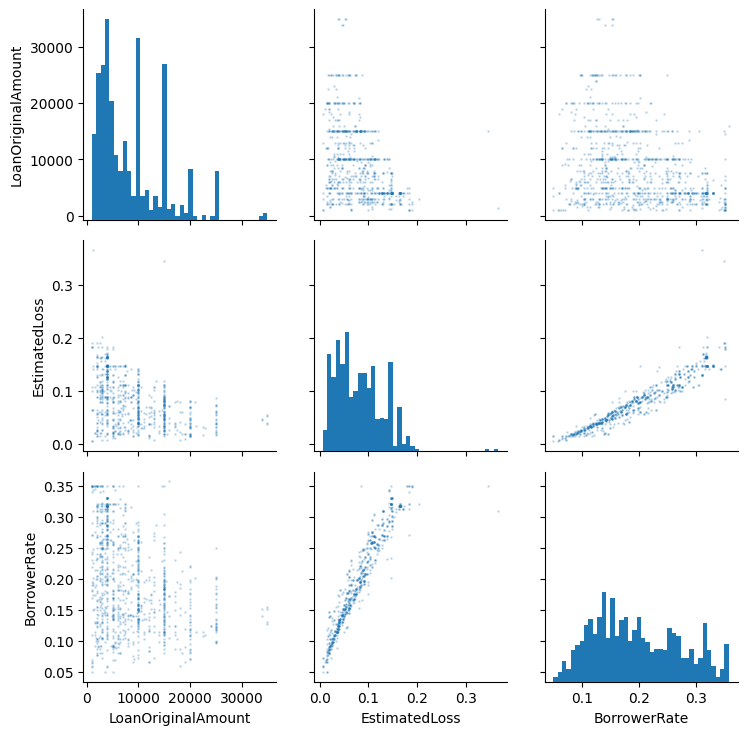

In [111]:
# Those are the categories that we will plot
stats = ["LoanOriginalAmount", "EstimatedLoss", "BorrowerRate"]
g = sns.PairGrid(data=df.sample(1000), vars=stats)
g.map_offdiag(plt.scatter, alpha=0.2, s=0.8)
g.map_diag(plt.hist, bins=40);

> The larger the interest rate the larger the estimated loss.<br>
The relation between loan amount and estimation loss is similar to loan amount with borrower rate.

#### Does the interest rate and loan amount affect the borrower ability to pay back ?

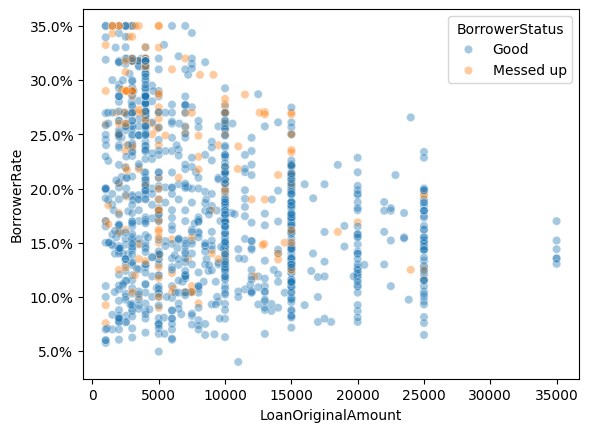

In [112]:
ax = sns.scatterplot(data=df.sample(1200), x="LoanOriginalAmount", y="BorrowerRate", hue="BorrowerStatus", alpha=0.4);
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

> It's not that obvious but most of people who messed up paying their loan had interest rate higher than 20.0%

#### Do home owners payback higher inerest ?

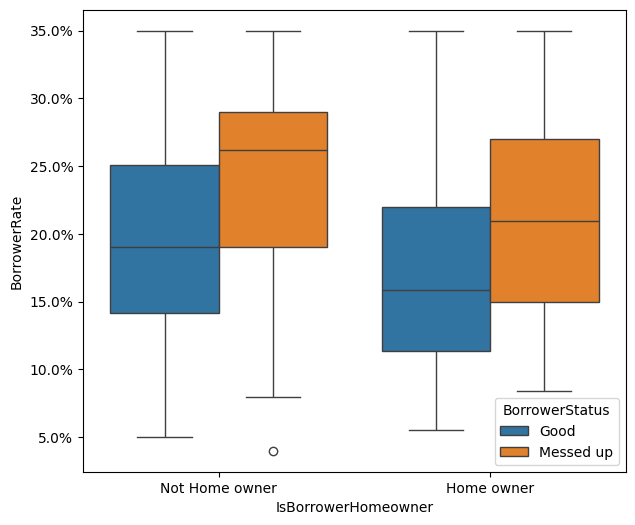

In [113]:
# Make it bigger so the legend doesn't appear in the center
plt.figure(figsize=(7,6))

ax = sns.boxplot(data=df.sample(1500), x="IsBorrowerHomeowner", y="BorrowerRate", hue="BorrowerStatus",)
ax.yaxis.set_major_formatter(mtick.PercentFormatter(1))

plt.xticks([0,1],["Not Home owner", "Home owner"]);

> No, they  pay less interest.<br>
People who messed up in both cases had higher interest rate.<br>

#### How much money do employees borrow ?

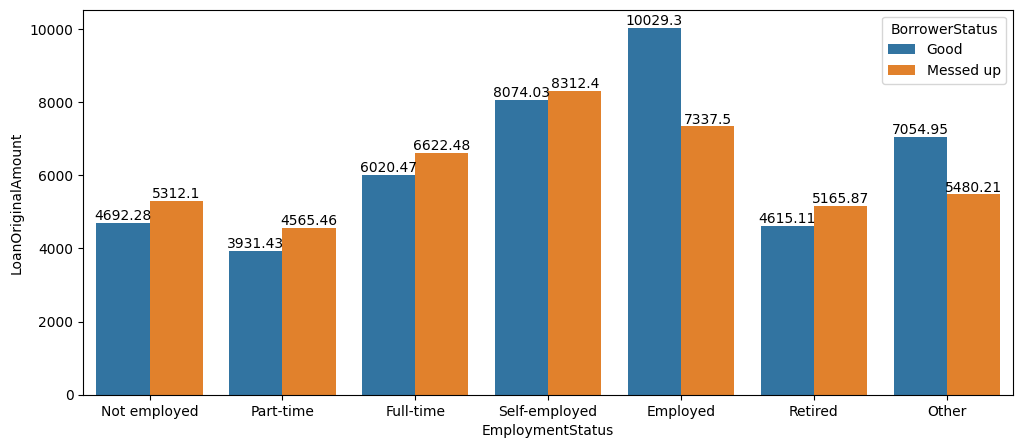

In [114]:
# Make the plot bigger so the xticks doesn't overlap
plt.figure(figsize=(12,5))


order = ["Not employed", "Part-time", "Full-time", "Self-employed", "Employed", "Retired", "Other"]
ax = sns.barplot(data=df, x="EmploymentStatus", y="LoanOriginalAmount" ,hue="BorrowerStatus", order=order, errorbar=None);
# add text to bars
for c in ax.containers:
    ax.bar_label(c)

> Employed people borrow the most amount of money.<br>
Part time borrow the least.<br>
The larger the loan the more likely people will fail paying it.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

>**BorrowerRate vs BorrowerStatus** (plot 1):
The data points of people who couldn't pay back their loans are clustered at higher interest rates in almost all employment satus.

>**LoanOriginalAmount vs EstimatedLostt** (plot 2):
Similar to The **LoanOriginalAmount vs BorrowerRate** there is less points the larger the loan amount and there are linear clusters on the those values \\$5,000 \\$10,000 \\$15,000 \\$20,000 and \\$25,000. which is not a surprise because EstimatedLoss has a strong linear relation with BorrowerRate.<br>

> **BorrowerRate vs EstimatedLoss** (plot 2):
The plot shows us that there is a linear relation between EstimatedLoss and BorrowerRate the higher the BorrowerRate the more confident the bank that loans will be defaulted and borrower won't be able to pay back.<br>

> **BorrwerStatus vs BorrowerRate** (plot 3):
The plot shows us that though most people do well at paying loans but most of those who messed up had to pay higher interest rate as there is more points the higher the interest rate go.<br>

>  **BorrwerStatus vs BorrowerRate** (plot 4):
This is the most plot among the previous plots that proves that the higher the interest rate the likely the borrower won't pay back.

> **plot 4 generally**:
Weirdly Non home owners tend to pay higher interest rate (that's cruel) and they are more likely to not be able to payback unlike the homeowners.

> **plot 5**:
Employed people are the one who take most loans.<br>
People who mess up usually take higher loans than those who don't as the plot shows (except for employed people and other employment status).<br>
Self employed people who messed up are the one who take the largest amount of loans compared to others who messed up.<br>
Part time are the one who take the least amount of loans<br>.

### Were there any interesting or surprising interactions between features?

> **EmploymentStatus vs BorrowerStatus** (plot 1):
The plot shows us surprisingly that a large number of people with full time jobs failed to pay their loans. I personally don't have explanation for this. Do you ?

> **LoanOriginalAmount vs BorrowerRate** (plot 3):
There is no obvious relation between LoanOriginalAmount and BorrowerRate but we can see that there are less points the more the loan amount. We also can clearly see that there are linear vertical clusters on the \\$5,000 \\$10,000 \\$15,000 \\$20,000 and \\$25,000 loans those numbers are multiples of 5000.<br>

## Conclusions
> Interest rate is only good for the lender and borrower mess up. Employed people are the most people who take loans and they take larger loans. Most people do good but a large number of them mess up.

<h3>List of summary findings</h3><br>
<ul>
    <li>Most people payback their loans but a large number of them doesn't</li>
    <li>Interest rate makes borrowers mess up since those who messed up had to pay higher interest rate</li>
    <li>Employed people are the most people who take loans</li>
    <li>Employed people also takes the largest loans</li>
    <li>Full time poeple are more likely to fail paying back their debts</li>
    <li>Home owner are less likely to fail paying back their debts</li>
    <li>Banks are more confident that you won't payback if the loan has higher interest rate</li>
    <li>The larger the loan the less the interest rate</li>
    <li>Don't borrow money from those greedy lenders as only 5 loans were cancelled</li>
    <li>Employed people usually earn \$50,000-\$75,000 yearly and \$5000 monthly</li>
    <li>Don't lend money to people who earn \$0 if you want your money back</li>
</ul>